# Sentiment Analysis on Twitter Data (Sentiment140)

## Objective
The objective of this task is to perform sentiment analysis on large-scale textual data using Natural Language Processing (NLP) techniques.  
Using the Sentiment140 dataset containing 1.6 million tweets, we preprocess text data, apply a sentiment analysis model, and derive meaningful insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('vader_lexicon')



[nltk_data] Downloading package stopwords to C:\Users\Diya mariam
[nltk_data]     philip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Diya mariam
[nltk_data]     philip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv(
    r"D:\bigData\airline_data\sentiment140.csv",
    encoding="latin-1",
    header=None
)

df.columns = ["sentiment", "id", "date", "query", "user", "text"]
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Overview

The dataset contains over 1.6 million tweets, making it a large-scale text dataset.
This makes it suitable for demonstrating big data text processing and sentiment analysis.

In [3]:
df["sentiment"].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

## Text Preprocessing

The following preprocessing steps are applied:
- Convert text to lowercase
- Remove URLs, mentions, hashtags
- Remove special characters and numbers
- Remove stopwords

In [4]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

In [5]:
df["clean_text"] = df["text"].apply(clean_text)
df[["text", "clean_text"]].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [6]:
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,sentiment,id,date,query,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


## Sentiment Analysis Model

VADER (Valence Aware Dictionary and sEntiment Reasoner) is used for sentiment analysis.
It is a lexicon-based model well-suited for social media text.

In [7]:
sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

df["predicted_sentiment"] = df["sentiment_score"].apply(
    lambda x: "Positive" if x > 0 else "Negative"
)

df.head()

,sentiment,id,date,query,user,text,clean_text,sentiment_score,predicted_sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,-0.3818,Negative
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,-0.7269,Negative
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds,0.4939,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,-0.2500,Negative
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see,-0.4939,Negative


## Sentiment Distribution

The following visualization shows the distribution of predicted sentiment in the dataset.

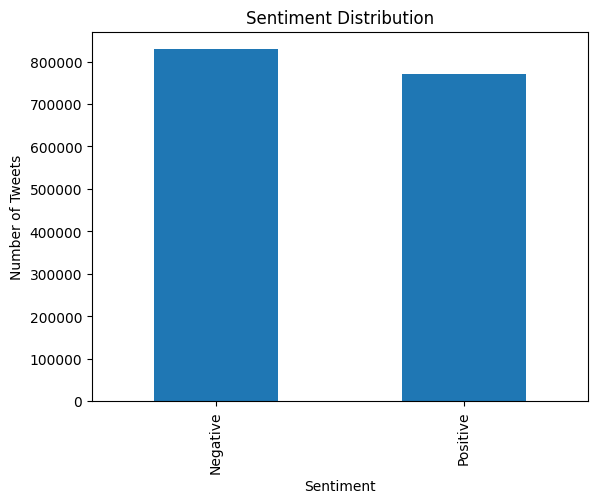

In [12]:
sentiment_counts = df["predicted_sentiment"].value_counts()

sentiment_counts.plot(
    kind="bar",
    title="Sentiment Distribution",
    xlabel="Sentiment",
    ylabel="Number of Tweets"
)
plt.show()

In [14]:
df["predicted_sentiment"].value_counts()

predicted_sentiment
Negative    829016
Positive    770984
Name: count, dtype: int64

## Insights

- Sentiment analysis was performed on **1.6 million tweets**, demonstrating scalability on large textual data.
- The sentiment distribution shows:
  - **Negative tweets:** 829,016  
  - **Positive tweets:** 770,984
- Slightly more negative sentiment indicates that users often express concerns or dissatisfaction on social media.
- The near-balanced distribution reflects a wide range of public opinions.
- VADER sentiment analysis proved effective for handling informal social media text.

## Conclusion

In this task, sentiment analysis was successfully applied to a large-scale Twitter dataset using NLP techniques. Through text preprocessing and VADER-based sentiment scoring, meaningful insights were extracted from unstructured data. This project demonstrates the practical application of sentiment analysis for understanding public opinion at scale.